In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# import cv2
# import skimage

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity as ssim

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Алгоритмы кластеризации</b></h3>

#  Домашнее задание

#### Задание  

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.


1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
        a) Для отображения картинки воспользуйтесь вспомогательной функцией:
                import matplotlib.pyplot as plt
                import cv2
                import skimage
                
                def draw_picture(image, title, bgr=False):
                    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
                    new_image = cv2.merge([r, g, b])
                    plt.figure(figsize=(7, 5))
                    plt.axis(‘off’)
                    plt.imshow(new_image)
                    plt.title(title)
                    plt.show()
        b) Для загрузки картинки можно использовать код:
                img = cv.imread(path)
2. Реализуйте три модели кластеризации:
        a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
        b) DBSCAN
        c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.
3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
4. Сформулируйте выводы по проделанной работе.
        a) Какая модель показала лучший результат?

###### 1. Получите данные и загрузите их в рабочую среду 

In [12]:
img = Image.open('nails_x25.jpg') 
arr = np.array(img, dtype=np.uint8)
arr.shape

(185, 188, 3)

###### 2. Реализуйте три модели кластеризации:
        a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
        b) DBSCAN
        c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [47]:
# function to transform the image
def create_image(arr, n_center=3, method='kmeans'):
    
    arr_flat = arr.reshape([arr.shape[0] * arr.shape[1], 3])
    
    if method == 'kmeans':
        cluster_obj = KMeans(n_clusters=n_center, random_state=42)
    elif method == 'dbscan':
        cluster_obj = DBSCAN(eps=1.6)
    elif method == 'agglo':
        cluster_obj = AgglomerativeClustering(n_clusters=n_center)
    else:
        raise Exception('unknown clustering method')
    
    cluster = cluster_obj.fit_predict(arr_flat)
    
    arr_df = pd.DataFrame(arr_flat, columns=['r', 'g', 'b'])
    arr_df['cluster'] = cluster
    
    cluster_dict = dict()

    for c in arr_df['cluster'].unique():
        c_ave = arr_df.loc[arr_df['cluster'] == c, ['r', 'g', 'b']].mean(axis=0)
        cluster_dict[c] = c_ave.tolist()
        
    new_arr = [cluster_dict[c] for c in cluster]
    new_arr = np.array(new_arr, dtype=np.uint8)
    new_arr = new_arr.reshape(arr.shape[0], arr.shape[1], 3)
    
    new_img = Image.fromarray(new_arr, mode='RGB')
        
    return new_img, cluster_dict

###### 3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

In [35]:
# different experimentations
kmeans_2, _ = create_image(arr, 2, method='kmeans')
kmeans_5, _ = create_image(arr, 5, method='kmeans')
kmeans_10, _ = create_image(arr, 10, method='kmeans')
kmeans_20, _ = create_image(arr, 20, method='kmeans')

In [21]:
ssim_score_kmeans_2 = ssim(np.array(img), np.array(kmeans_2), channel_axis=2)
ssim_score_kmeans_5 = ssim(np.array(img), np.array(kmeans_5), channel_axis=2)
ssim_score_kmeans_10 = ssim(np.array(img), np.array(kmeans_10), channel_axis=2)
ssim_score_kmeans_20 = ssim(np.array(img), np.array(kmeans_20), channel_axis=2)

In [48]:
dbscan, _ = create_image(arr, method='dbscan')
ssim_score_dbscan = ssim(np.array(img), np.array(dbscan), channel_axis=2)
ssim_score_dbscan

0.4105824700904553

In [14]:
agglo_2, _ = create_image(arr, 2, method='agglo')
ssim_score_agglo_2 = ssim(np.array(img), np.array(agglo_2), channel_axis=2)
ssim_score_agglo_2

In [25]:
agglo_5, _ = create_image(arr, 5, method='agglo')
ssim_score_agglo_5 = ssim(np.array(img), np.array(agglo_5), channel_axis=2)
ssim_score_agglo_5

0.5759322467007518

In [26]:
agglo_10, _ = create_image(arr, 10, method='agglo')
ssim_score_agglo_10 = ssim(np.array(img), np.array(agglo_10), channel_axis=2)
ssim_score_agglo_10

0.7448201873912829

In [27]:
agglo_20, _ = create_image(arr, 20, method='agglo')
ssim_score_agglo_20 = ssim(np.array(img), np.array(agglo_20), channel_axis=2)
ssim_score_agglo_20

0.8569965440619699

In [20]:
ssim_score_agglo_2 = ssim(np.array(img), np.array(agglo_2), channel_axis=2)
ssim_score_agglo_2

0.4306580429545737

Text(0.5, 1.0, 'Agglo - clusters=20, SSIM=0.86')

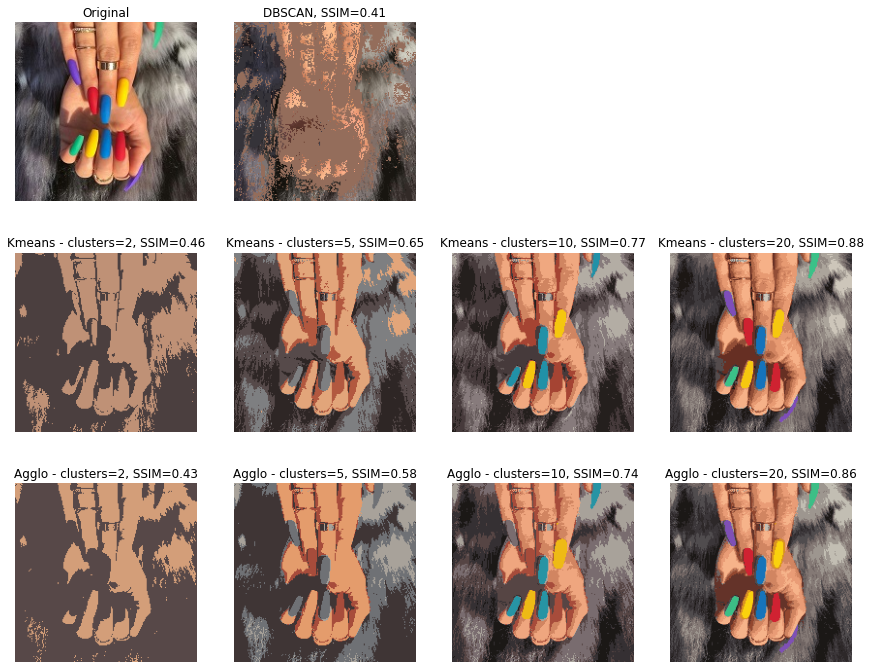

In [51]:
# plot the final photos
f, axarr = plt.subplots(3,4, figsize=(15,12))

axarr[0,0].imshow(arr)
axarr[0,0].axis('off')
axarr[0,0].set_title('Original')

axarr[0,1].imshow(dbscan)
axarr[0,1].axis('off')
axarr[0,1].set_title(f'DBSCAN, SSIM={ssim_score_dbscan:.2f}')

axarr[0,2].axis('off')
axarr[0,3].axis('off')

axarr[1,0].imshow(kmeans_2)
axarr[1,0].axis('off')
axarr[1,0].set_title(f'Kmeans - clusters=2, SSIM={ssim_score_kmeans_2:.2f}')

axarr[1,1].imshow(kmeans_5)
axarr[1,1].axis('off')
axarr[1,1].set_title(f'Kmeans - clusters=5, SSIM={ssim_score_kmeans_5:.2f}')

axarr[1,2].imshow(kmeans_10)
axarr[1,2].axis('off')
axarr[1,2].set_title(f'Kmeans - clusters=10, SSIM={ssim_score_kmeans_10:.2f}')

axarr[1,3].imshow(kmeans_20)
axarr[1,3].axis('off')
axarr[1,3].set_title(f'Kmeans - clusters=20, SSIM={ssim_score_kmeans_20:.2f}')

axarr[2,0].imshow(agglo_2)
axarr[2,0].axis('off')
axarr[2,0].set_title(f'Agglo - clusters=2, SSIM={ssim_score_agglo_2:.2f}')

axarr[2,1].imshow(agglo_5)
axarr[2,1].axis('off')
axarr[2,1].set_title(f'Agglo - clusters=5, SSIM={ssim_score_agglo_5:.2f}')

axarr[2,2].imshow(agglo_10)
axarr[2,2].axis('off')
axarr[2,2].set_title(f'Agglo - clusters=10, SSIM={ssim_score_agglo_10:.2f}')

axarr[2,3].imshow(agglo_20)
axarr[2,3].axis('off')
axarr[2,3].set_title(f'Agglo - clusters=20, SSIM={ssim_score_agglo_20:.2f}')


###### 4. Сформулируйте выводы по проделанной работе.
        a) Какая модель показала лучший результат?

### ВЫВОДЫ: 

С увеличением количесва кластеров схожесть картинок увеличивается. Чем больше кластеров тем больше цветов оставляем в палитре.
Самый лучший результат  показал метод k-средних. 
Метод AgglomerativeClustering показал похожий результат, но очень затратен по ресурсам (для того чтобы модель смогла обучиться, первоначальную картинку пришлось уменьшить в 4 раза так как для вычислений не хватало оперативной памяти). И сами вычисления занимали намного больше времени по сравнению с другими методами.
DBSCAN показал самый худший результат, скорее всего этот метод не подходит для кластеризации изображений.